In [1]:
from ultralytics import YOLO

# Load the pre-trained YOLO model
model = YOLO("yolov8n.pt")  # Using the smallest pre-trained YOLOv8 model


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\sh3685\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]


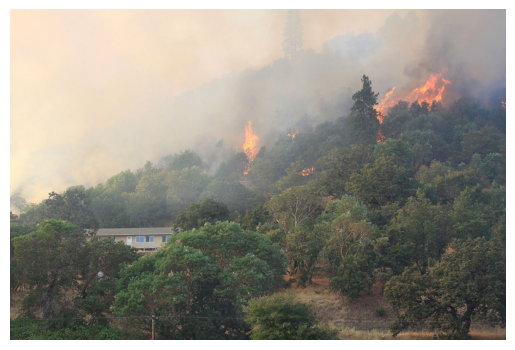

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an aerial wildfire image
image_path = "wildfire_aerial.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Display the original image
plt.imshow(image)
plt.axis("off")
plt.show()


In [4]:
# Run inference on the image
results = model(image)

# Print detected objects
for result in results:
    for box in result.boxes:
        print(f"Class: {model.names[int(box.cls)]}, Confidence: {box.conf:.2f}")



0: 448x640 (no detections), 42.0ms
Speed: 1.9ms preprocess, 42.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


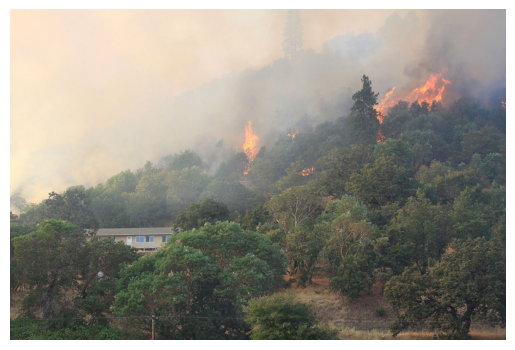

In [6]:
import numpy as np

# Create a copy of the image
image_with_boxes = image.copy()

# Draw bounding boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        confidence = float(box.conf)  # Confidence score
        class_id = int(box.cls)  # Class ID

        # Draw rectangle
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Add label
        label = f"{model.names[class_id]}: {confidence:.2f}"
        cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, (0, 255, 0), 2)

# Display the results
plt.imshow(image_with_boxes)
plt.axis("off")
plt.show()


In [ ]:
output_path = "wildfire_damage_detected.jpg"
cv2.imwrite(output_path, cv2.cvtColor(image_with_boxes, cv2.COLOR_RGB2BGR))
print(f"Processed image saved as {output_path}")
